# Company Bankruptcy Prediction

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
#we import whats requir# Company Bankruptcy Predictioned for ploting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Explore the data

In [4]:
#Explore the data
df = pd.read_csv('./data.csv') #
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


### Data cleaning

We check if theres any missing values or duplicates in the data

In [6]:
### Data cleaning

#We check if theres any missing values or duplicates in the data
df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

###### We cant see all the values so we compute the sum of them all to double check

In [7]:
###### We cant see all the values so we compute the sum of them all to double check
df.isnull().sum().sum()

0

In [101]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6814    False
6815    False
6816    False
6817    False
6818    False
Length: 6819, dtype: bool

In [8]:
df.duplicated().sum()

0

###### There is no duplicates or null values in the dataset. Now lets check the datatype of the attributes

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

### Scaling the data

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Bankrupt?,6819.0,0.032263,0.176710,0.0,0.000000,0.000000,0.000000,1.0
ROA(C) before interest and depreciation before interest,6819.0,0.505180,0.060686,0.0,0.476527,0.502706,0.535563,1.0
ROA(A) before interest and % after tax,6819.0,0.558625,0.065620,0.0,0.535543,0.559802,0.589157,1.0
ROA(B) before interest and depreciation after tax,6819.0,0.553589,0.061595,0.0,0.527277,0.552278,0.584105,1.0
Operating Gross Margin,6819.0,0.607948,0.016934,0.0,0.600445,0.605997,0.613914,1.0
...,...,...,...,...,...,...,...,...
Liability to Equity,6819.0,0.280365,0.014463,0.0,0.276944,0.278778,0.281449,1.0
Degree of Financial Leverage (DFL),6819.0,0.027541,0.015668,0.0,0.026791,0.026808,0.026913,1.0
Interest Coverage Ratio (Interest expense to EBIT),6819.0,0.565358,0.013214,0.0,0.565158,0.565252,0.565725,1.0
Net Income Flag,6819.0,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.0


Data looks scaled between 1 and 0. However we should check anyways

In [14]:
#Data looks scaled between 1 and 0. However we should check anywaysover_count = 0
over_index = []
over_count = 0
over_index = []
for col in df.columns:
    print('column : '+col)
    max_val = df[col].max();
    min_val = df[col].min();
    
    if max_val > 1:
        over_count += 1
        over_index.append(col)
    if min_val < 0:
        under_count += 1
        under_index.append(col)
        
    print('column : ' + col)
    print('max :  ' + format(max_val))
    print('min :  ' + format(min_val))
    print('___________________________________________________________________________')
print('###########################################################################')
print('###########################################################################')
print('over max count : ', over_count)
print('under min count : ', under_count)

column : Bankrupt?
column : Bankrupt?
max :  1
min :  0
___________________________________________________________________________
column :  ROA(C) before interest and depreciation before interest
column :  ROA(C) before interest and depreciation before interest
max :  1.0
min :  0.0
___________________________________________________________________________
column :  ROA(A) before interest and % after tax
column :  ROA(A) before interest and % after tax
max :  1.0
min :  0.0
___________________________________________________________________________
column :  ROA(B) before interest and depreciation after tax
column :  ROA(B) before interest and depreciation after tax
max :  1.0
min :  0.0
___________________________________________________________________________
column :  Operating Gross Margin
column :  Operating Gross Margin
max :  1.0
min :  0.0
___________________________________________________________________________
column :  Realized Sales Gross Margin
column :  Realized Sal

###### We can see that 24 of the attributes are not scales to 1 and 0. Now we should scale them

In [15]:
###### We can see that 24 of the attributes are not scales to 1 and 0. Now we should scale the
over_index

[' Operating Expense Rate',
 ' Research and development expense rate',
 ' Interest-bearing debt interest rate',
 ' Revenue Per Share (Yuan ¥)',
 ' Total Asset Growth Rate',
 ' Net Value Growth Rate',
 ' Current Ratio',
 ' Quick Ratio',
 ' Total debt/Total net worth',
 ' Accounts Receivable Turnover',
 ' Average Collection Days',
 ' Inventory Turnover Rate (times)',
 ' Fixed Assets Turnover Frequency',
 ' Revenue per person',
 ' Allocation rate per person',
 ' Quick Assets/Current Liability',
 ' Cash/Current Liability',
 ' Inventory/Current Liability',
 ' Long-term Liability to Current Assets',
 ' Current Asset Turnover Rate',
 ' Quick Asset Turnover Rate',
 ' Cash Turnover Rate',
 ' Fixed Assets to Assets',
 ' Total assets to GNP price']

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
df[over_index] = MinMaxScaler().fit_transform(df[over_index])
df[over_index].describe().T

,count,mean,std,min,25%,50%,75%,max
Operating Expense Rate,6819.0,0.199734,0.324092,0.0,1.568443e-14,2.780369e-14,4.149149e-01,1.0
Research and development expense rate,6819.0,0.195434,0.260350,0.0,1.284448e-14,5.100200e-02,3.456914e-01,1.0
Interest-bearing debt interest rate,6819.0,0.016614,0.109369,0.0,2.050710e-13,3.242749e-13,5.379326e-13,1.0
Revenue Per Share (Yuan ¥),6819.0,0.000440,0.017122,0.0,5.175954e-12,9.064806e-12,1.535007e-11,1.0
Total Asset Growth Rate,6819.0,0.551361,0.290062,0.0,4.864865e-01,6.406406e-01,7.397397e-01,1.0
Net Value Growth Rate,6819.0,0.000168,0.012236,0.0,4.726355e-14,4.951292e-14,5.352220e-14,1.0
Current Ratio,6819.0,0.000147,0.012110,0.0,2.747290e-12,3.849882e-12,5.916192e-12,1.0
Quick Ratio,6819.0,0.000908,0.026510,0.0,5.120155e-13,8.030847e-13,1.327097e-12,1.0
Total debt/Total net worth,6819.0,0.000444,0.016942,0.0,3.025200e-13,5.579763e-13,9.329268e-13,1.0
Accounts Receivable Turnover,6819.0,0.001313,0.028569,0.0,7.290899e-14,9.936454e-14,1.493593e-13,1.0


We can see that scaling was done successfully, due to min and max being 0 and 1.

In [18]:
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

### Oversampling

Text(0.5, 1.0, 'Target feature - Bankrupt?')

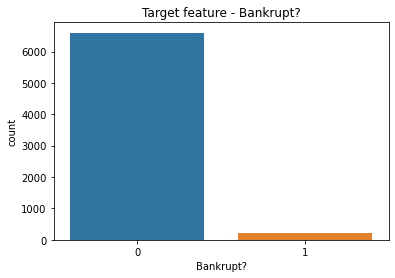

In [19]:
sns.countplot(x=df['Bankrupt?'])
plt.title('Target feature - Bankrupt?')

Here we can see that the data is not balanced at all.
When data is imbalanced, we can use oversampling methods to increase the samples of the data with less instances.

In [20]:
from imblearn.over_sampling import SMOTE

In [22]:
X_imb = df.drop(labels=['Bankrupt?'], axis=1)
y_imb = df['Bankrupt?']

X, y =SMOTE().fit_resample(X_imb, y_imb)

<AxesSubplot:xlabel='Bankrupt?', ylabel='count'>

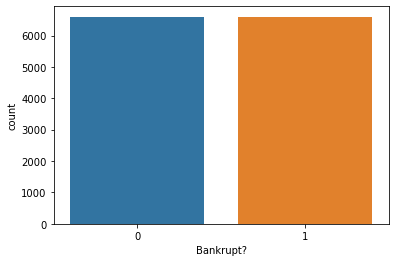

In [23]:
sns.countplot(x=y)

### Feature Selection

In [24]:
#import libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt


AxesSubplot(0.125,0.125;0.775x0.755)


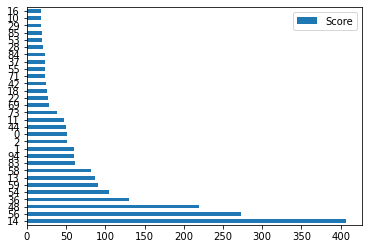

(' Tax rate (A)',
 ' Cash/Total Assets',
 ' Fixed Assets Turnover Frequency',
 ' Debt ratio %',
 ' Quick Assets/Total Assets',
 ' Cash/Current Liability',
 ' Current Liability to Assets',
 ' Current Liability to Assets',
 ' Interest-bearing debt interest rate')

In [25]:

#Fit the model
bestfeatures = SelectKBest(score_func=chi2, k=30)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

selected_features=X.columns[bestfeatures.get_support()]
X[selected_features]

#concatenate the two dataframes
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

#print best features
print(featureScores.nlargest(30,'Score').plot(kind='barh'))

#plot graph of feature importances 
plt.show()
X.iloc[:,14].name,X.iloc[:,56].name,X.iloc[:,48].name,X.iloc[:,36].name,X.iloc[:,54].name,X.iloc[:,58].name,X.iloc[:,59].name,X.iloc[:,59].name,X.iloc[:,13].name




In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scale=scaler.fit_transform(X[selected_features])

## Logistic Regression

In [29]:
#splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scale, y,test_size=0.3)

In [30]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter = 10000)
LR.fit(X_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix,classification_report

y_pred = LR.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

confusion matrix:
 [[1791  201]
 [ 142 1826]]


In [31]:
from sklearn.metrics import accuracy_score
#checking accuracy
LRacc = accuracy_score(y_test,y_pred)
print('\naccuracy score = ',LRacc)


accuracy score =  0.9133838383838384


###### Predicting a company is not going to get bankrupt where in fact it will, is critical. We have to work on having lowest possibility of predicting that. 

###### Priority is to have recall high, also known as true positive rate. Which justifies our choice on relying on the ROC curve metric

In [32]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn import metrics


0.9134709569987265


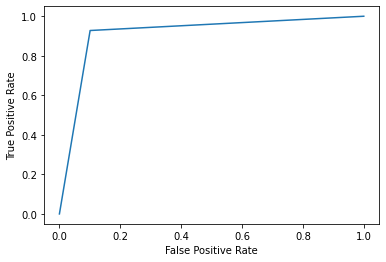

In [34]:

lr_auc = roc_auc_score(y_test, y_pred)
print(lr_auc)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

#create ROC curve
pyplot.plot(fpr,tpr)
pyplot.ylabel('True Positive Rate')
pyplot.xlabel('False Positive Rate')
pyplot.show()

#### We got a roc curve of 0.91 with the Logistic Regression

### Cross-Validation

In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
scores = cross_val_score(LR, X, y, cv=5)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.86969697 0.81590909 0.91325758 0.90943539 0.91549829]


No handles with labels found to put in legend.


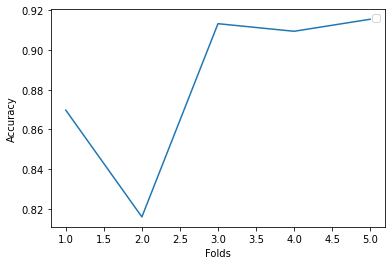

In [39]:
plt.plot(range(1,6), scores)
plt.xlabel('Folds')
plt.ylabel('Accuracy')
plt.legend();

In [40]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.8159090909090909, 0.8847594646732577, 0.9154982948086396)

##### Here we can see that mean is 88% and not far from the results we got, which shows that we do not have overfitting or underfitting

## K-nearest neighbors KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier as KNN
# check over/underfitting
train_scores = []
test_scores = []
for i in range(1, 12): # n_neighbors = 1~12
    Knn = KNN(n_neighbors=i)
    Knn.fit(X_train,y_train)
    
    train_scores.append(Knn.score(X_train,y_train))
    test_scores.append(Knn.score(X_test,y_test))

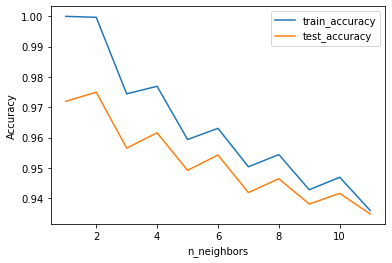

In [44]:
plt.plot(range(1,12), train_scores, label='train_accuracy')
plt.plot(range(1,12), test_scores, label='test_accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend();

The graph shows that KNN with 2 neighbors leads to the highest test accuracy, and whats more that 2 would lead to an overfitting

In [46]:
Knn = KNN(n_neighbors=2)
Knn.fit(X_train, y_train)


y_pred = Knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('Final - Accuracy : ', accuracy_score(y_test,y_pred))

Final - Accuracy :  0.975


In [48]:
print('\nconfusion matrix:\n',cm)
print("\nClassification Report: \n",classification_report(y_test,y_pred))


confusion matrix:
 [[1898   94]
 [   5 1963]]

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.95      0.97      1992
           1       0.95      1.00      0.98      1968

    accuracy                           0.97      3960
   macro avg       0.98      0.98      0.97      3960
weighted avg       0.98      0.97      0.97      3960



0.9751352972867078


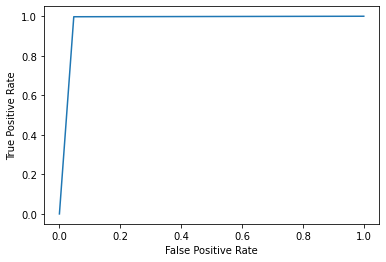

In [49]:
knn_auc = roc_auc_score(y_test, y_pred)
print(knn_auc)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

#create ROC curve
pyplot.plot(fpr,tpr)
pyplot.ylabel('True Positive Rate')
pyplot.xlabel('False Positive Rate')
pyplot.show()

#### KNN showed AUROC=0.97 according to the roc curve which is a very good result

In [50]:
scores = cross_val_score(Knn, X, y, cv=5)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.92083333 0.92954545 0.975      0.9795377  0.98105343]


No handles with labels found to put in legend.


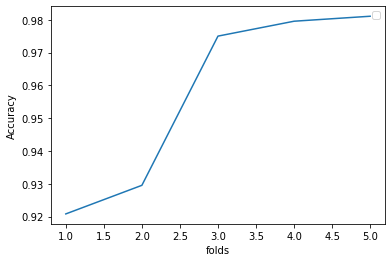

In [51]:
plt.plot(range(1,6), scores)
plt.xlabel('folds')
plt.ylabel('Accuracy')
plt.legend();

In [52]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.9208333333333333, 0.9571939841767427, 0.9810534293292914)

#### 5 Fold Cross Validation for KNN showed a 95% accuracy 

##### Here we can see that mean is not far from the results we got, which shows that we do not have overfitting or underfitting

#### KNN scored an accuracy of a roc curve 97%

## Support Vector Machine

In [53]:
from sklearn.svm import SVC

SVM = SVC()
SVM.fit(X_train, y_train)

y_pred = SVM.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

print('\nFinal - Accuracy : ', accuracy_score(y_test,y_pred))

print("\n## Support Vector MachineClassification Report:\n",classification_report(y_test,y_pred))

confusion matrix:
 [[1824  168]
 [  25 1943]]

Final - Accuracy :  0.9512626262626263

## Support Vector MachineClassification Report:
               precision    recall  f1-score   support

           0       0.99      0.92      0.95      1992
           1       0.92      0.99      0.95      1968

    accuracy                           0.95      3960
   macro avg       0.95      0.95      0.95      3960
weighted avg       0.95      0.95      0.95      3960



0.9514796992849447


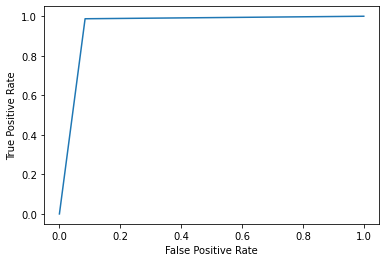

In [54]:
svm_auc = roc_auc_score(y_test, y_pred)
print(svm_auc)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

#create ROC curve
pyplot.plot(fpr,tpr)
pyplot.ylabel('True Positive Rate')
pyplot.xlabel('False Positive Rate')
pyplot.show()

#### Support Vector Machine showed AUROC=0.95 according to the roc curve

No handles with labels found to put in legend.


Cross-Validation Accuracy Scores [0.87272727 0.85151515 0.93143939 0.92080333 0.93444487]


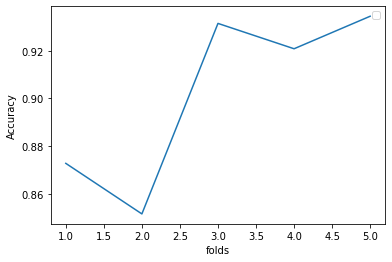

In [55]:
scores = cross_val_score(SVM, X, y, cv=5)
print('Cross-Validation Accuracy Scores', scores)
plt.plot(range(1,6), scores)
plt.xlabel('folds')
plt.ylabel('Accuracy')
plt.legend();

In [56]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.8515151515151516, 0.9021860036515207, 0.9344448654793482)

#### 5 Fold Cross Validation for SVM showed a 90% accuracy 

##### Here we can see that mean is not far from the results we got, which shows that we do not have overfitting or underfitting

## Random Forest

In [57]:
#training model
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 60,random_state = 0)
RF.fit(X_train,y_train)

#getting confusion matrix
y_pred = RF.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)


print("Classification Report",classification_report(y_test,y_pred))

confusion matrix:
 [[1909   83]
 [  19 1949]]
Classification Report               precision    recall  f1-score   support

           0       0.99      0.96      0.97      1992
           1       0.96      0.99      0.97      1968

    accuracy                           0.97      3960
   macro avg       0.97      0.97      0.97      3960
weighted avg       0.97      0.97      0.97      3960



0.9743394308943089


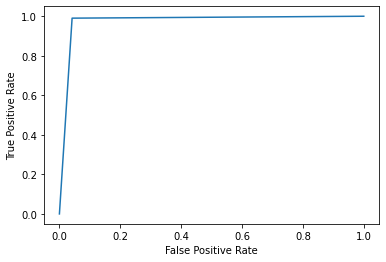

In [59]:
RF_auc = roc_auc_score(y_test, y_pred)
print(RF_auc)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

#create ROC curve
pyplot.plot(fpr,tpr)
pyplot.ylabel('True Positive Rate')
pyplot.xlabel('False Positive Rate')
pyplot.show()

#### Random Forest showed an AUROC=0.97 with the roc curve metric

No handles with labels found to put in legend.


Cross-Validation Accuracy Scores [0.95909091 0.95757576 0.98295455 0.98370595 0.98446381]


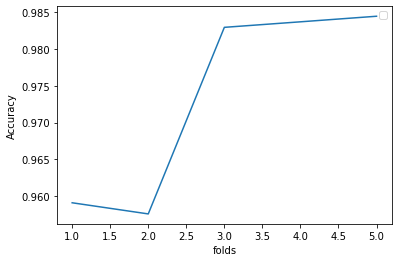

In [60]:
scores = cross_val_score(RF, X, y, cv=5)
print('Cross-Validation Accuracy Scores', scores)

plt.plot(range(1,6), scores)
plt.xlabel('folds')
plt.ylabel('Accuracy')
plt.legend();



In [61]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.9575757575757575, 0.9735581946788843, 0.984463812050019)

#### 5 Fold Cross Validation for Random Forest showed a 97% accuracy 

## Decision Tree

In [62]:
#training model
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)

#getting confusion matrix
y_pred = DT.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
print('accuracy score = ',accuracy_score(y_test,y_pred))
print("Classification Report",classification_report(y_test,y_pred))

confusion matrix:
 [[1870  122]
 [  89 1879]]
accuracy score =  0.9467171717171717
Classification Report               precision    recall  f1-score   support

           0       0.95      0.94      0.95      1992
           1       0.94      0.95      0.95      1968

    accuracy                           0.95      3960
   macro avg       0.95      0.95      0.95      3960
weighted avg       0.95      0.95      0.95      3960



0.9467657214222746


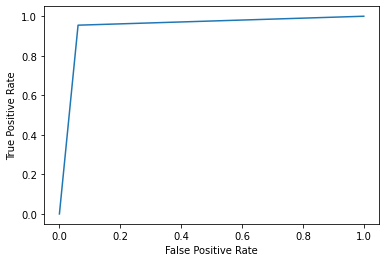

In [63]:
DT_auc = roc_auc_score(y_test, y_pred)
print(DT_auc)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

#create ROC curve
pyplot.plot(fpr,tpr)
pyplot.ylabel('True Positive Rate')
pyplot.xlabel('False Positive Rate')
pyplot.show()

#### Decision Tree showed an AUROC= 0.94

No handles with labels found to put in legend.


Cross-Validation Accuracy Scores [0.92840909 0.9280303  0.95909091 0.95869648 0.96059113]


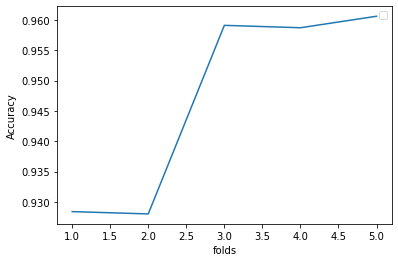

In [64]:
scores = cross_val_score(DT, X, y, cv=5)
print('Cross-Validation Accuracy Scores', scores)

plt.plot(range(1,6), scores)
plt.xlabel('folds')
plt.ylabel('Accuracy')
plt.legend();

In [65]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.928030303030303, 0.9469635823946169, 0.9605911330049262)

#### 5 Fold Cross Validation for Decision Tree showed a 94% accuracy 

Text(0.5, 1.0, 'Plotting the Model Accuracies')

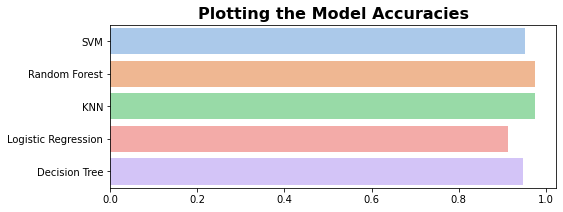

In [71]:
#comparing accuracies
plt.figure(figsize= (8,3))
name = ['SVM','Random Forest','KNN','Logistic Regression','Decision Tree']
sns.barplot(x = ac,y = name,palette='pastel')
plt.title("Plotting the Model Accuracies", fontsize=16, fontweight="bold")

## Results

## KNN showed that it is the best model with an accuracy of 97.5%